In [24]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import numpy
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [3]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

In [4]:
ds = pd.read_csv("input/dataset_clean.csv",  index_col = 0)
ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana


In [78]:
df = ds[['v2a1', "age", "escolari","instlevel1", "instlevel2", "instlevel3", "instlevel4", "instlevel5", "instlevel6", "instlevel7", "instlevel8", "instlevel9", "Region", "Zona", "Target", "parentesco1", "Genero"]]
df.describe()

,v2a1,age,escolari,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,Target,parentesco1
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.652316e+05,34.303547,7.200272,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,3.302292,0.311081
std,1.504571e+05,21.612261,4.730877,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,1.009565,0.462960
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000e+04,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1.300000e+05,31.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,2.000000e+05,51.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,2.353477e+06,97.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
print(df[df.age.isnull()].shape)
print(df[df.escolari.isnull()].shape)
print(df[df.v2a1.isnull()].shape)

(0, 15)
(0, 15)
(6860, 15)


In [7]:
df[["age", "escolari", "v2a1"]].iplot(kind='box')

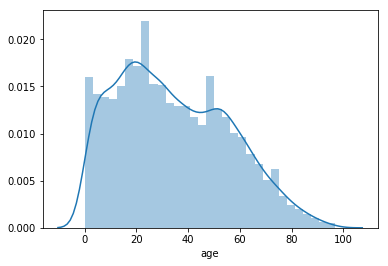

In [8]:
#df['age'].iplot(kind="hist")

# hist_data = [df['age'], df["escolari"]]

# fig = ff.create_distplot(hist_data, ['distplot', "escolari"])
# iplot(fig, filename='Basic Distplot')

sns.distplot(df.age)

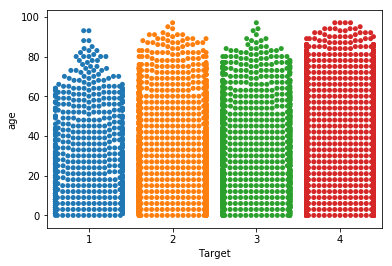

In [9]:
# data = [go.Scatter(x=df.age, y=df.escolari,  mode = 'markers')]

# iplot(data)

sns.swarmplot(x='Target', y='age', data=df)


/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning:

invalid value encountered in greater_equal

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning:

invalid value encountered in less_equal



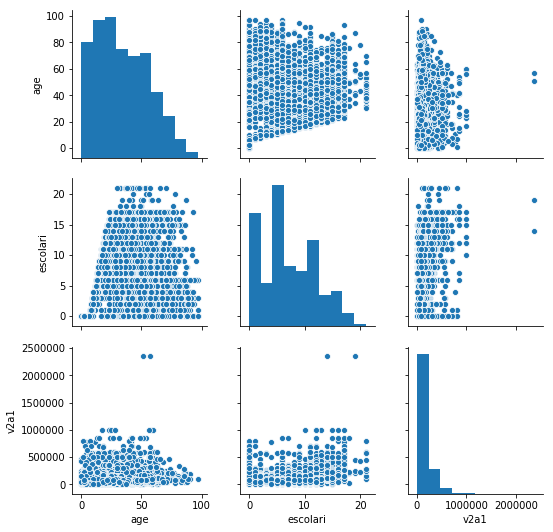

In [11]:
sns.pairplot(df[["age", "escolari", "v2a1"]])
#df[["age", "escolari", "v2a1"]].scatter_matrix()

In [15]:
data = []

for d in df.groupby("Region"):
    data.append(go.Box(x=d[1].v2a1, name=d[0], boxmean=True))
iplot(data)

#sns.catplot(data=df, x='Region', y='v2a1', kind='box')

In [18]:
df[df.v2a1 > 0].v2a1.shape

(2668,)

In [29]:
data = []

for d in df.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].v2a1, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot(data)

In [30]:
data = []

for d in df.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].age, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot(data)

In [88]:
data = []
dfEdad = df[df.age > 21]

for d in dfEdad.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].escolari, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot(data)

In [39]:
data = []
dfPaga = df[df["v2a1"] > 0]
for d in dfPaga.groupby(["Target"]):
    data.append(go.Box(y=d[1].v2a1, name=d[0], boxmean=True))
iplot(data)


In [40]:
data = []
dfPaga = df[df["v2a1"] > 0]
for d in dfPaga.groupby(["Target"]):
    data.append(go.Box(y=d[1].escolari, name=d[0], boxmean=True))
iplot(data)

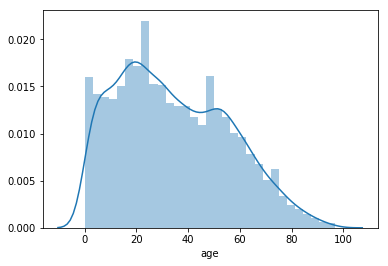

In [26]:

# data = [
#      go.Histogram(x=df["age"],opacity=0.75,name="global", nbinsx = 20),
# ]

# iplot(go.Figure(data=data, layout=go.Layout(barmode='overlay')))
sns.distplot(df.age)

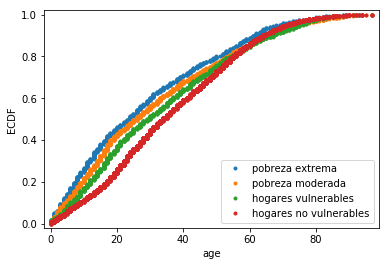

In [47]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements.
    Empirical Cumulative Distribution Functions
    """
    # Number of data points: n
    count = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / len(data)

    return x, y

x4, y4 = ecdf(df[df.Target == 4].age)
x3, y3 = ecdf(df[df.Target == 3].age)
x2, y2 = ecdf(df[df.Target == 2].age)
x1, y1 = ecdf(df[df.Target == 1].age)

plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(x3, y3, marker='.', linestyle='none')
plt.plot(x4, y4, marker='.', linestyle='none')
plt.legend(('pobreza extrema', 'pobreza moderada', 'hogares vulnerables', "hogares no vulnerables"), loc='lower right')
plt.xlabel('age')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()
    

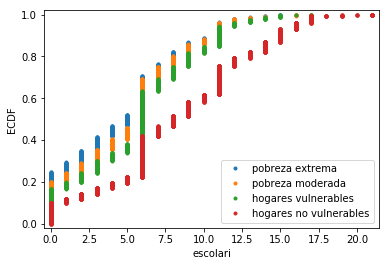

In [38]:
x4, y4 = ecdf(df[df.Target == 4].escolari)
x3, y3 = ecdf(df[df.Target == 3].escolari)
x2, y2 = ecdf(df[df.Target == 2].escolari)
x1, y1 = ecdf(df[df.Target == 1].escolari)

plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(x3, y3, marker='.', linestyle='none')
plt.plot(x4, y4, marker='.', linestyle='none')
plt.legend(('pobreza extrema', 'pobreza moderada', 'hogares vulnerables', "hogares no vulnerables"), loc='lower right')
plt.xlabel('escolari')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

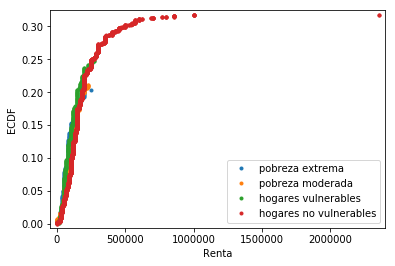

In [49]:
x4, y4 = ecdf(df[df.Target == 4].v2a1)
x3, y3 = ecdf(df[df.Target == 3].v2a1)
x2, y2 = ecdf(df[df.Target == 2].v2a1)
x1, y1 = ecdf(df[df.Target == 1].v2a1)

plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(x3, y3, marker='.', linestyle='none')
plt.plot(x4, y4, marker='.', linestyle='none')
plt.legend(('pobreza extrema', 'pobreza moderada', 'hogares vulnerables', "hogares no vulnerables"), loc='lower right')
plt.xlabel('Renta')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

In [79]:
#df.pivot_table(index="age", columns=["age", "escolari"])
#df.groupby(["escolari", 'age',]).aggregate('count')

def institution(row):
    for x in range(1, 10):
        if row["instlevel"+str(x)] == 1:
            return str(x)
df["level"] = df.apply(institution, axis=1)


In [21]:
df.pivot_table(values='escolari',index='age',columns='level', aggfunc=len)
#seaborn.barplot(data=df, x='age', y='instlevel1',)
# plt.ylabel('Nivel de satisfacción con el sueldo')
# plt.xlabel('Bono recibido')
# plt.ylim(0, 4)
# plt.xticks(rotation=45)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# seaborn.despine(left=True)

level,1,2,3,4,5,6,7,8,9
age,,,,,,,,,
0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,96.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(6335, 16)


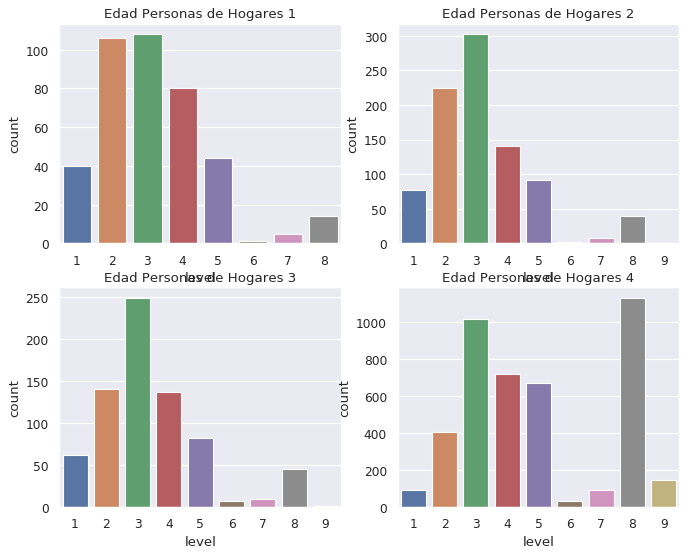

In [69]:
# Analizamos la distribución de la edad de los individuos
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
dfEdad = df[df.age > 21]
print(dfEdad.shape)
subplot(2,2,1)
title('Edad Personas de Hogares 1')
sns.countplot(data=dfEdad[dfEdad["Target"] == 1].sort_values("level"), x="level")
subplot(2,2,2)
title('Edad Personas de Hogares 2')
sns.countplot(data=dfEdad[dfEdad["Target"] == 2].sort_values("level"), x="level")
subplot(2,2,3)
title('Edad Personas de Hogares 3')
sns.countplot(data=dfEdad[dfEdad["Target"] == 3].sort_values("level"), x="level")
subplot(2,2,4)
title('Edad Personas de Hogares 4')
sns.countplot(data=dfEdad[dfEdad["Target"] == 4].sort_values("level"), x="level")


(2973, 18)


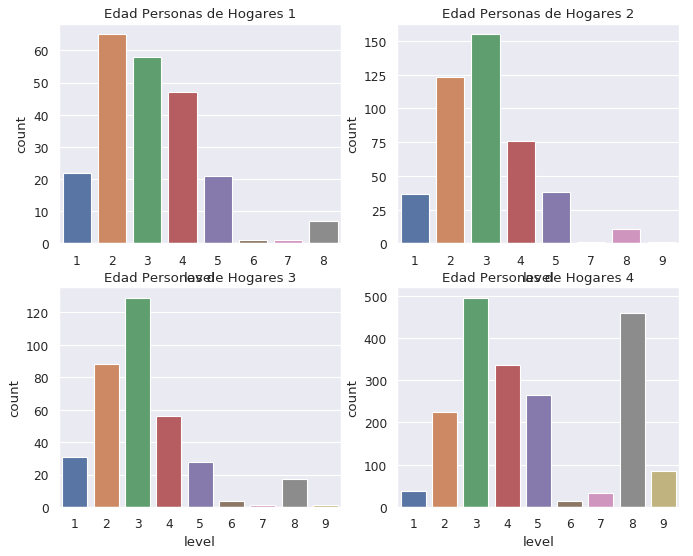

In [80]:
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
dfEdad = df[df.parentesco1  == 1]
print(dfEdad.shape)
subplot(2,2,1)
title('Edad Personas de Hogares 1')
sns.countplot(data=dfEdad[dfEdad["Target"] == 1].sort_values("level"), x="level")
subplot(2,2,2)
title('Edad Personas de Hogares 2')
sns.countplot(data=dfEdad[dfEdad["Target"] == 2].sort_values("level"), x="level")
subplot(2,2,3)
title('Edad Personas de Hogares 3')
sns.countplot(data=dfEdad[dfEdad["Target"] == 3].sort_values("level"), x="level")
subplot(2,2,4)
title('Edad Personas de Hogares 4')
sns.countplot(data=dfEdad[dfEdad["Target"] == 4].sort_values("level"), x="level")


(2973, 18)


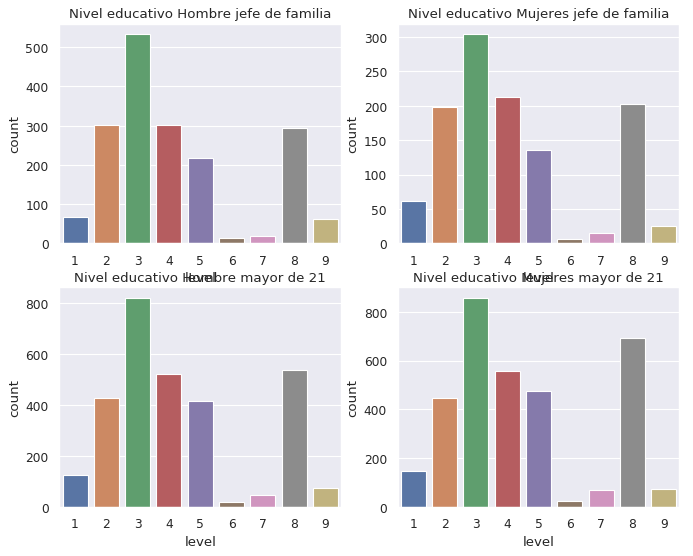

In [87]:
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
dfEdad = df[df.parentesco1  == 1]
print(dfEdad.shape)
subplot(2,2,1)
title('Nivel educativo Hombre jefe de familia')
sns.countplot(data=dfEdad[dfEdad["Genero"] == "male"].sort_values("level"), x="level")
subplot(2,2,2)
title('Nivel educativo Mujeres jefe de familia')
sns.countplot(data=dfEdad[dfEdad["Genero"] == "female"].sort_values("level"), x="level")
dfEdad = df[df.age  > 21]
subplot(2,2,3)
title('Nivel educativo Hombre mayor de 21')
sns.countplot(data=dfEdad[dfEdad["Genero"] == "male"].sort_values("level"), x="level")
subplot(2,2,4)
title('Nivel educativo Mujeres mayor de 21')
sns.countplot(data=dfEdad[dfEdad["Genero"]  == "female"].sort_values("level"), x="level")

In [28]:
from scipy import stats

# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.normsns.countplot(data=df[df["Target"] == 1].sort_values("level"), x="level").fit(df.age)
loc, scale

(34.303547138223294, 21.611130356711083)

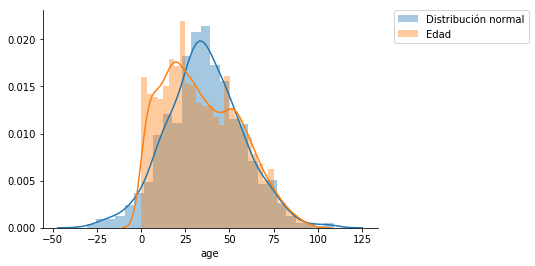

In [45]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
sns.distplot(sample, label='Distribución normal')
sns.distplot(df.age, label='Edad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.despine()

In [34]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(df["age"], percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(df["age"])), percs)

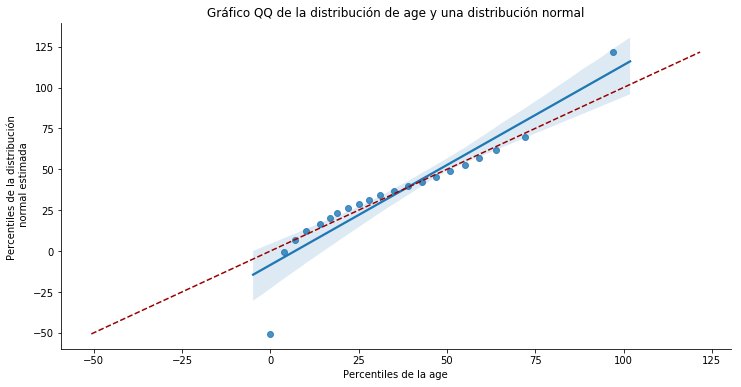

In [39]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la age')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de age y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#990000", ls="--")

sns.despine()

In [42]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_age = numpy.percentile(df["age"], percs)
qn_escolari = numpy.percentile(df["escolari"], percs)

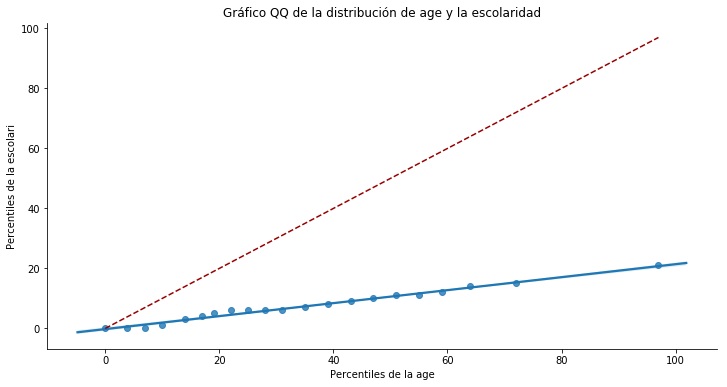

In [44]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_age, y=qn_escolari)
plt.xlabel('Percentiles de la age')
plt.ylabel('Percentiles de la escolari')
plt.title('Gráfico QQ de la distribución de age y la escolaridad')

x = numpy.linspace(numpy.min((qn_age.min(), qn_escolari.min())), numpy.max((qn_age.max(),qn_escolari.max())))
plt.plot(x,x, color="#990000", ls="--")

sns.despine()

- Qué tipo de variable es cada una?

edad, escolari y v2a1 son variables continuas

- Existen outliers en las variables seleccionadas?

General no

- Hay valores faltantes? Qué decisión tomarán al respecto en esta instancia de análisis? Es mejor descartarlos o completarlos con un valor particular?

v2a1 es el unico que tiene valores en NAN, y prefiero dejarlos asi porque probablemente propietarios de su casa

- Cómo es la distribución de las variables en el dataset? Se distribuyen de manera normal? Qué implicancias tiene esto?


- Cómo es la distribución condicionada a otra variable?